In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('../week 1 task/cleaned_data.csv', index_col=0)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 1 to 4423
Data columns (total 95 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Marital status                          3452 non-null   int64  
 1   Application order                       3452 non-null   int64  
 2   Daytime/evening attendance              3452 non-null   int64  
 3   Previous qualification                  3452 non-null   int64  
 4   Previous qualification (grade)          3452 non-null   float64
 5   Nationality                             3452 non-null   int64  
 6   Admission grade                         3452 non-null   float64
 7   Displaced                               3452 non-null   int64  
 8   Educational special needs               3452 non-null   int64  
 9   Debtor                                  3452 non-null   int64  
 10  Tuition fees up to date                 3452 non-null   int64  
 

In [4]:
#Checking the variance of the numeric variables
numeric = ['Age at enrollment','Previous qualification (grade)','Admission grade', 'Unemployment rate','Inflation rate','GDP','Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)']

In [5]:
school_df = data.copy()

#  Feature Creation

 Develop new features based on domain knowledge (e.g., study time per credit
)
• Create interaction terms between existing features
• Implement polynomial features for numerical variables
• Develop time-based features (e.g., time since last ex

In [6]:
school_df['Curricular units (Average grade)']	= (school_df['Curricular units 1st sem (grade)'] + school_df['Curricular units 2nd sem (grade)'])/2
school_df['Total Curricular units (enrolled)'] = school_df['Curricular units 1st sem (enrolled)']	+ school_df['Curricular units 2nd sem (enrolled)']
school_df['Total Curricular units (evaluations)'] = school_df['Curricular units 1st sem (evaluations)'] + school_df['Curricular units 2nd sem (evaluations)']
school_df['Total Curricular units (approved)'] = school_df['Curricular units 2nd sem (approved)']	+ school_df['Curricular units 2nd sem (approved)']
school_df['Completion_Rate_1st'] = school_df['Curricular units 1st sem (approved)'] / school_df['Curricular units 1st sem (enrolled)']
school_df['Completion_Rate_2nd'] = school_df['Curricular units 2nd sem (approved)'] / school_df['Curricular units 2nd sem (enrolled)']





In [7]:
# Create interaction terms
school_df['Completion_Grade_Interaction'] = school_df['Completion_Rate_1st'] * school_df['Admission grade']
school_df['Completion_Age_Interaction'] = school_df['Completion_Rate_1st'] * school_df['Age at enrollment']
school_df['Grade_Interaction'] = school_df['Admission grade'] * school_df['Previous qualification (grade)']
school_df['Previous_Age_Interaction'] = school_df['Previous qualification (grade)'] * school_df['Age at enrollment']


# Display the new interaction features
# print(school_df[['Completion_Rate_1st', 'Completion_Grade_Interaction', 
#                  'Completion_Age_Interaction', 'Grade_Interaction', 
#                  'Previous_Age_Interaction']])

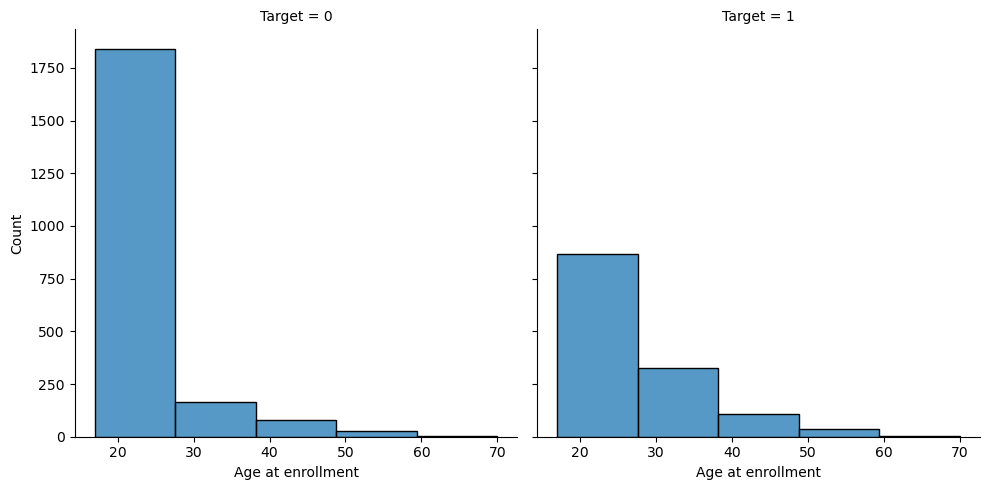

In [8]:
sns.displot(data=school_df,x='Age at enrollment',col='Target',binwidth=10)
plt.show()

In [9]:
school_df['Grouped Age at enrollment'] = pd.qcut(school_df['Age at enrollment'], q=6, labels=[1, 2, 3, 4, 5,6])
school_df['Grouped Age at enrollment'].value_counts()

Grouped Age at enrollment
1    820
2    703
6    571
5    566
3    433
4    359
Name: count, dtype: int64

In [10]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3452 entries, 1 to 4423
Columns: 106 entries, Marital status to Grouped Age at enrollment
dtypes: category(1), float64(90), int64(15)
memory usage: 2.8 MB


In [11]:
numeric = [
    'Age at enrollment',
'Previous qualification (grade)',
'Admission grade',
'Curricular units 1st sem (enrolled)',
'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (approved)',
'Curricular units 1st sem (grade)',
'Curricular units 2nd sem (enrolled)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 2nd sem (approved)',
'Curricular units 2nd sem (grade)',
'Unemployment rate',
'Inflation rate',
'GDP','Completion_Rate_2nd',
'Completion_Rate_1st',
'Total Curricular units (approved)',
'Total Curricular units (evaluations)',
'Total Curricular units (enrolled)',
'Curricular units (Average grade)',
'Completion_Grade_Interaction', 
'Completion_Age_Interaction',
'Grade_Interaction', 
'Previous_Age_Interaction']

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


n = school_df[numeric]
y = school_df['Target']

# Define a range of degrees to test
degrees = [1, 2, 3]
scores = []

# Evaluate each degree using cross-validation
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    n_poly = poly.fit_transform(n)
    
    model = LinearRegression()
    cv_score = cross_val_score(model, n_poly, y, cv=3)  # 3-fold cross-validation
    scores.append(np.mean(cv_score))

# Display results
for degree, score in zip(degrees, scores):
    print(f'Degree: {degree}, Cross-Validation Score: {score:.4f}')

Degree: 1, Cross-Validation Score: 0.6508
Degree: 2, Cross-Validation Score: 0.6371
Degree: 3, Cross-Validation Score: -163.3861


Since the best score is of degree one, We can't create a new feature

### Feature Transformation
• Apply log transformation to skewed numerical features
• Bin continuous variables into categorical ones where appropriate
• Standardize numerical features

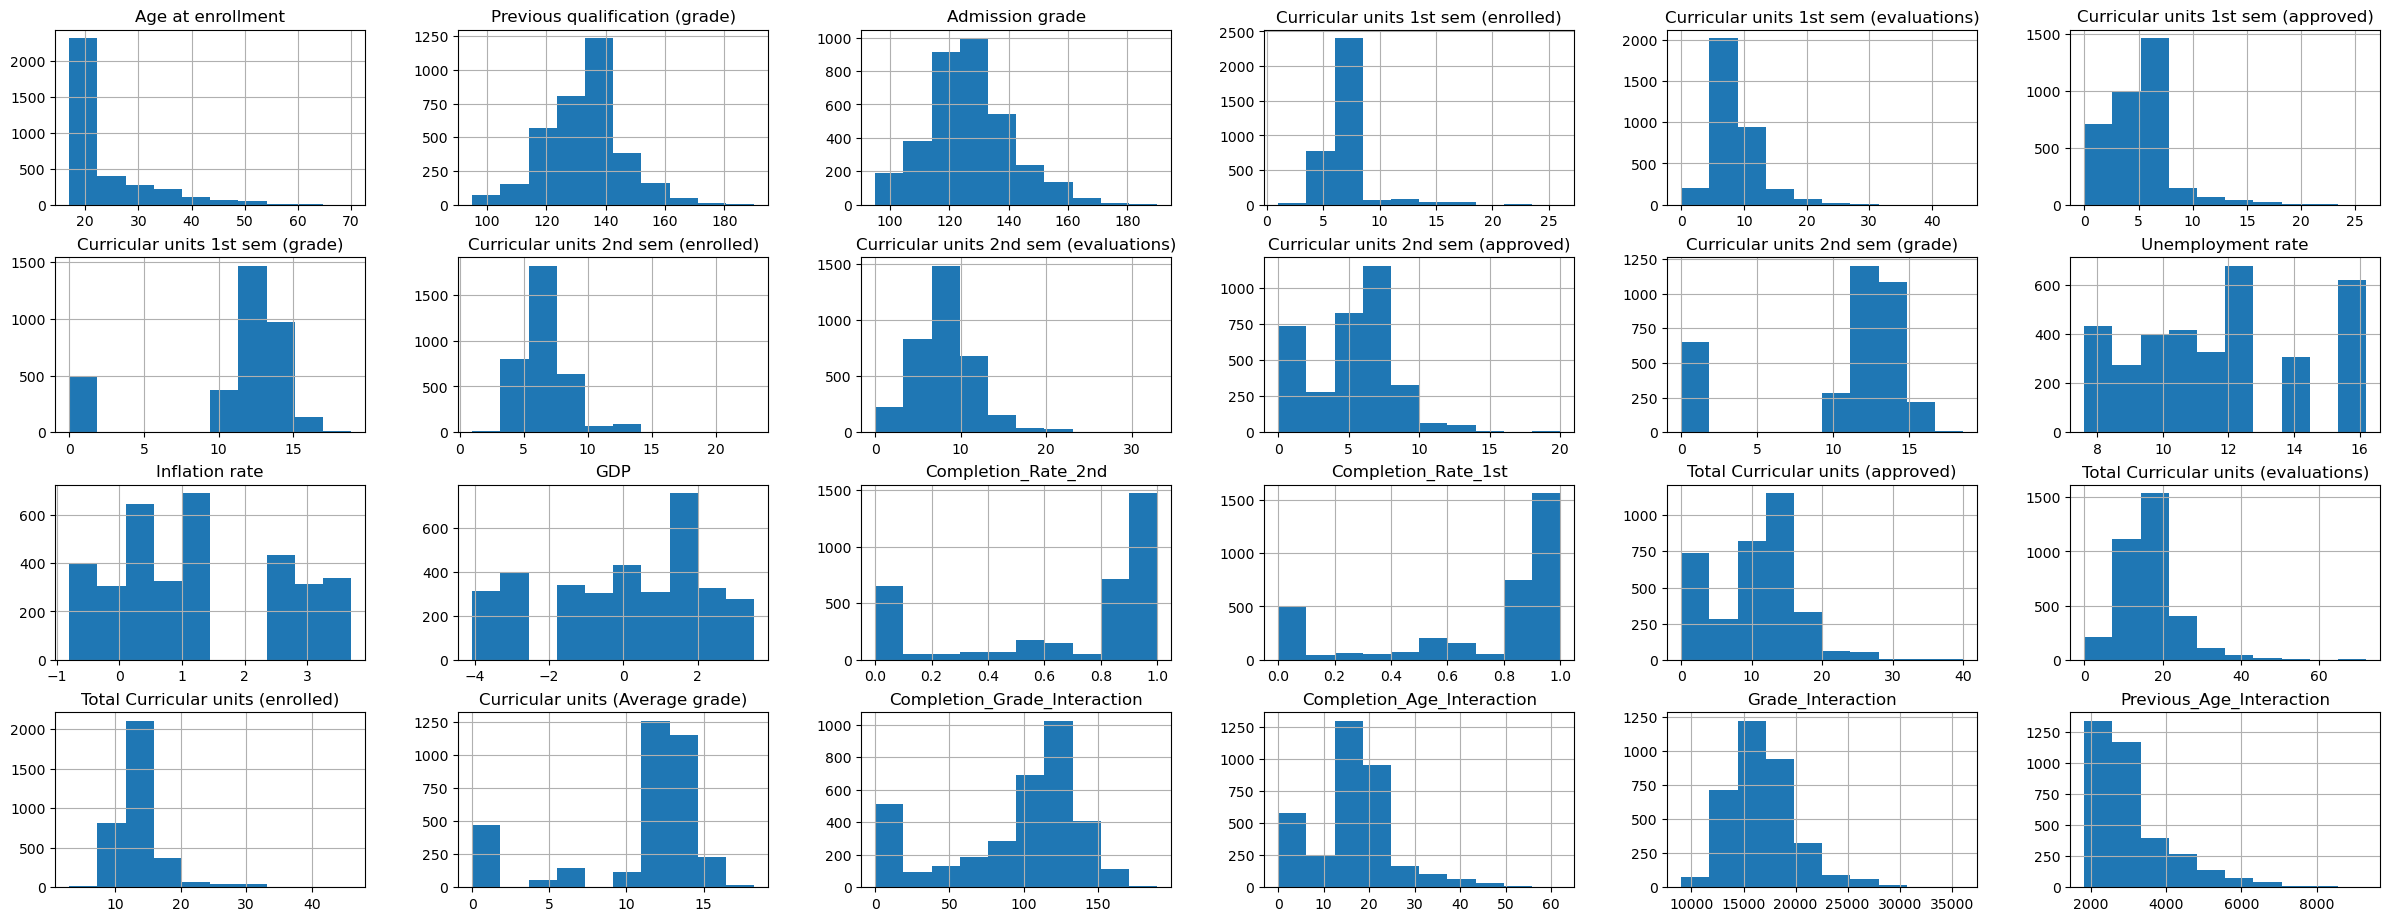

In [13]:
# Checking the distribution of the numeric variables
school_df[numeric].hist(figsize=(30,20),layout=(7,6))
plt.show()


In [14]:
skew_data = ['Curricular units 1st sem (enrolled)',
'Curricular units 1st sem (evaluations)',
'Curricular units 1st sem (approved)','Curricular units 2nd sem (enrolled)',
'Curricular units 2nd sem (evaluations)',
'Curricular units 2nd sem (approved)','Completion_Rate_2nd',
'Completion_Rate_1st',
'Total Curricular units (approved)',
'Total Curricular units (evaluations)',
'Total Curricular units (enrolled)',
'Curricular units (Average grade)',
'Completion_Grade_Interaction', 
'Completion_Age_Interaction',
'Grade_Interaction', 
'Previous_Age_Interaction']

In [15]:
df = school_df.copy()

In [16]:
for var in skew_data:
    school_df[var] = np.log(school_df[var] + 1)

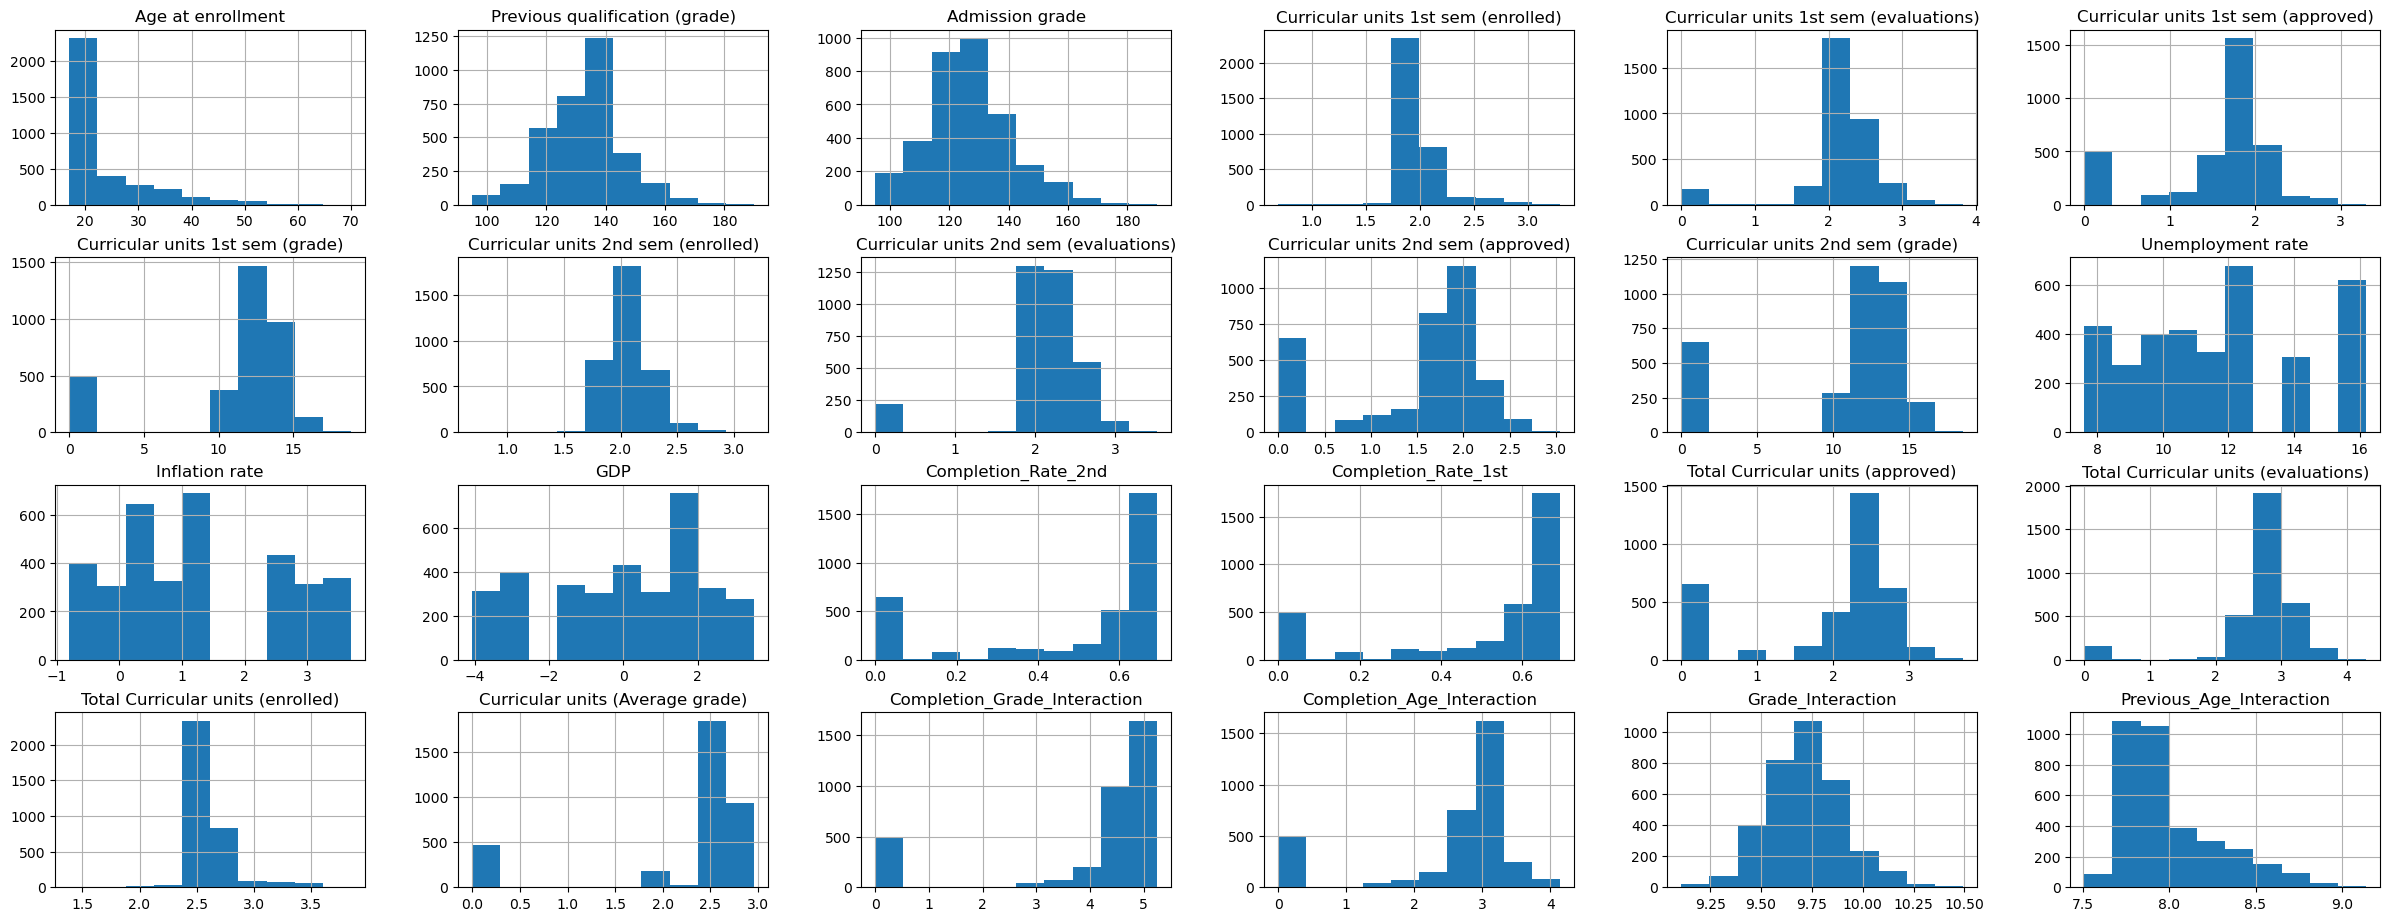

In [17]:
# Checking the distribution of the numeric variables
school_df[numeric].hist(figsize=(30,20),layout=(7,6))
plt.show()

In [18]:

school_df['Grouped Curricular units 2nd sem (grade)'] = pd.qcut(school_df['Curricular units 2nd sem (grade)'], q=5, labels=[1, 2, 3, 4, 5])
school_df['Grouped Curricular units 2nd sem (grade)'].value_counts()

Grouped Curricular units 2nd sem (grade)
2    786
1    701
5    691
4    678
3    596
Name: count, dtype: int64

In [19]:
school_df['Grouped Curricular units 1st sem (grade)'] = pd.qcut(school_df['Curricular units 1st sem (grade)'], q=6, labels=[1, 2, 3, 4, 5,6])
school_df['Grouped Curricular units 1st sem (grade)'].value_counts()

Grouped Curricular units 1st sem (grade)
5    630
3    617
2    593
1    576
4    523
6    513
Name: count, dtype: int64

In [20]:
school_df['Grouped Admission grade'] = pd.qcut(school_df['Admission grade'], q=5, labels=[1, 2, 3, 4, 5])
school_df['Grouped Admission grade'].value_counts()

Grouped Admission grade
2    698
1    695
3    689
5    688
4    682
Name: count, dtype: int64

In [21]:
school_df['Grouped Previous qualification (grade)'] = pd.qcut(school_df['Previous qualification (grade)'], q=6, labels=[1, 2, 3, 4, 5,6])
school_df['Grouped Previous qualification (grade)'].value_counts()

Grouped Previous qualification (grade)
3    928
1    624
5    590
6    556
2    541
4    213
Name: count, dtype: int64

In [22]:
X_train = school_df.drop('Target', axis=1)
y_train= school_df['Target']


X_columns = X_train.columns

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])

## Feature selection
1. Correlation Analysis

In [24]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr


In [25]:
corr_features = correlation(X_train, 0.499)
len(set(corr_features))

36

In [26]:
corr_features

{'AdmGrades_category',
 'Admission grade',
 'Age at enrollment',
 'Application mode_39',
 'Completion_Age_Interaction',
 'Completion_Grade_Interaction',
 'Completion_Rate_1st',
 'Completion_Rate_2nd',
 'Course_8014',
 'Course_9991',
 'Curricular units (Average grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 "Father's occupation_0",
 "Father's occupation_90",
 "Father's occupation_others",
 "Father's qualification_3",
 "Father's qualification_34",
 "Father's qualification_37",
 'Grade_Interaction',
 'Grouped Admission grade',
 'Grouped Age at enrollment',
 'Grouped Curricular units 1st sem (grade)',
 'Grouped Curricular units 2nd sem (grade)',
 'Grouped Previous qualification (grade)',
 'International',
 "Mother's qualification_3",
 "Mother's qualification_34",
 'Previous_Age_Interaction',
 

2. Recursive Feature Elimination

In [27]:
# Feature extraction
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=35)
fit = rfe.fit(X_train, y_train)
# print("Num Features: %s" % (fit.n_features_))
# print("Selected Features: %s" % (fit.support_))
# print("Feature Ranking: %s" % (fit.ranking_))
important_features = pd.DataFrame(list(zip(X_columns,fit.support_)),columns=['Feature','Important'])
list = important_features.sort_values(by='Important', ascending=False).iloc[:36,0].to_list()

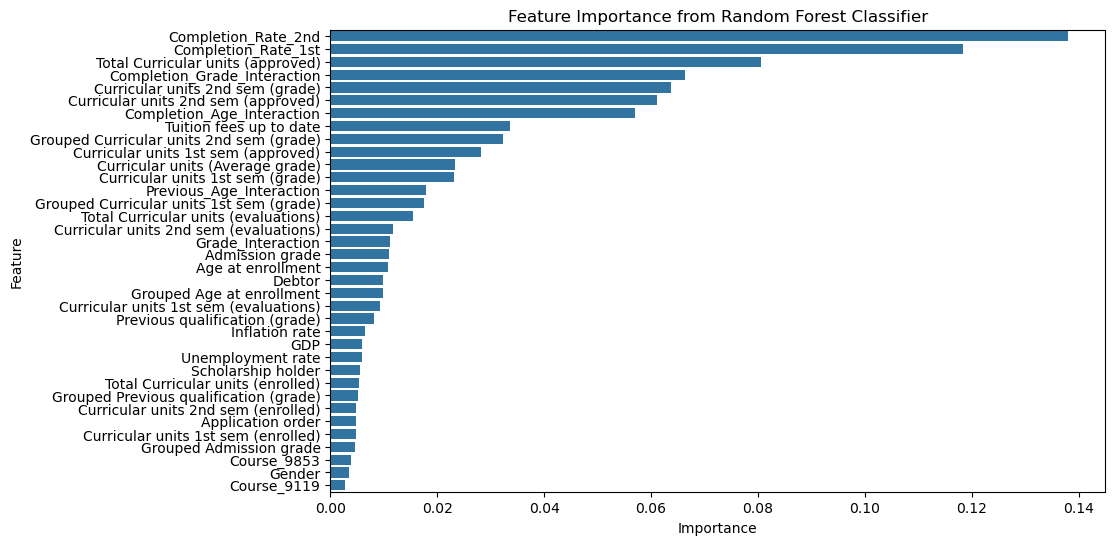

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).iloc[:36]

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.show()


In [29]:
list_2 = feature_importance_df['Feature'].to_list()
list_2

['Completion_Rate_2nd',
 'Completion_Rate_1st',
 'Total Curricular units (approved)',
 'Completion_Grade_Interaction',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Completion_Age_Interaction',
 'Tuition fees up to date',
 'Grouped Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units (Average grade)',
 'Curricular units 1st sem (grade)',
 'Previous_Age_Interaction',
 'Grouped Curricular units 1st sem (grade)',
 'Total Curricular units (evaluations)',
 'Curricular units 2nd sem (evaluations)',
 'Grade_Interaction',
 'Admission grade',
 'Age at enrollment',
 'Debtor',
 'Grouped Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Previous qualification (grade)',
 'Inflation rate',
 'GDP',
 'Unemployment rate',
 'Scholarship holder',
 'Total Curricular units (enrolled)',
 'Grouped Previous qualification (grade)',
 'Curricular units 2nd sem (enrolled)',
 'Application order',
 'Curricular units 1st sem (en

In [30]:
list_1 = ['AdmGrades_category',
 'Admission grade',
 'Age at enrollment',
 'Application mode_39',
 'Completion_Age_Interaction',
 'Completion_Grade_Interaction',
 'Completion_Rate_1st',
 'Completion_Rate_2nd',
 'Course_8014',
 'Course_9991',
 'Curricular units (Average grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 "Father's occupation_0",
 "Father's occupation_90",
 "Father's occupation_others",
 "Father's qualification_3",
 "Father's qualification_34",
 "Father's qualification_37",
 'Grade_Interaction',
 'Grouped Admission grade',
 'Grouped Age at enrollment',
 'Grouped Curricular units 1st sem (grade)',
 'Grouped Curricular units 2nd sem (grade)',
 'Grouped Previous qualification (grade)',
 'International',
 "Mother's qualification_3",
 "Mother's qualification_34",
 'Previous_Age_Interaction',
 'Total Curricular units (approved)',
 'Total Curricular units (enrolled)',
 'Total Curricular units (evaluations)']
for l in list:
    list_1.append(l)

for l2 in list_2:
    list_1.append(l2)
list_1

['AdmGrades_category',
 'Admission grade',
 'Age at enrollment',
 'Application mode_39',
 'Completion_Age_Interaction',
 'Completion_Grade_Interaction',
 'Completion_Rate_1st',
 'Completion_Rate_2nd',
 'Course_8014',
 'Course_9991',
 'Curricular units (Average grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 "Father's occupation_0",
 "Father's occupation_90",
 "Father's occupation_others",
 "Father's qualification_3",
 "Father's qualification_34",
 "Father's qualification_37",
 'Grade_Interaction',
 'Grouped Admission grade',
 'Grouped Age at enrollment',
 'Grouped Curricular units 1st sem (grade)',
 'Grouped Curricular units 2nd sem (grade)',
 'Grouped Previous qualification (grade)',
 'International',
 "Mother's qualification_3",
 "Mother's qualification_34",
 'Previous_Age_Interaction',
 

In [31]:
count = {}
for var in list_1:
    if var in count:
        count[var] += 1
    else:
        count[var] = 1

count

{'AdmGrades_category': 1,
 'Admission grade': 3,
 'Age at enrollment': 3,
 'Application mode_39': 1,
 'Completion_Age_Interaction': 3,
 'Completion_Grade_Interaction': 3,
 'Completion_Rate_1st': 3,
 'Completion_Rate_2nd': 3,
 'Course_8014': 1,
 'Course_9991': 2,
 'Curricular units (Average grade)': 3,
 'Curricular units 1st sem (approved)': 3,
 'Curricular units 1st sem (grade)': 3,
 'Curricular units 2nd sem (approved)': 3,
 'Curricular units 2nd sem (enrolled)': 3,
 'Curricular units 2nd sem (evaluations)': 3,
 'Curricular units 2nd sem (grade)': 3,
 "Father's occupation_0": 1,
 "Father's occupation_90": 1,
 "Father's occupation_others": 1,
 "Father's qualification_3": 1,
 "Father's qualification_34": 1,
 "Father's qualification_37": 1,
 'Grade_Interaction': 3,
 'Grouped Admission grade': 2,
 'Grouped Age at enrollment': 2,
 'Grouped Curricular units 1st sem (grade)': 3,
 'Grouped Curricular units 2nd sem (grade)': 2,
 'Grouped Previous qualification (grade)': 2,
 'International': 2,

In [32]:
z = []
for i,j in count.items():
    if count[i] >=2:
        z.append(i)
z

['Admission grade',
 'Age at enrollment',
 'Completion_Age_Interaction',
 'Completion_Grade_Interaction',
 'Completion_Rate_1st',
 'Completion_Rate_2nd',
 'Course_9991',
 'Curricular units (Average grade)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 'Grade_Interaction',
 'Grouped Admission grade',
 'Grouped Age at enrollment',
 'Grouped Curricular units 1st sem (grade)',
 'Grouped Curricular units 2nd sem (grade)',
 'Grouped Previous qualification (grade)',
 'International',
 'Previous_Age_Interaction',
 'Total Curricular units (approved)',
 'Total Curricular units (enrolled)',
 'Total Curricular units (evaluations)',
 'Inflation rate',
 'Course_9119',
 'Course_9853',
 'Unemployment rate',
 'Gender',
 'Debtor',
 'Tuition fees up to date',
 'Previous qualification (grade)',
 'Scholarship holder'

Dimensional Reduction
1. PCA

In [33]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X_train)
pca.n_components_

38

In [34]:
# Get the loading scores
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for the loadings
loading_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                          index=X_train.columns)

# Display the loadings
print("Feature Loadings:\n", loading_df)

Feature Loadings:
                                                PC1       PC2       PC3  \
Marital status                            0.063007  0.000212  0.167066   
Application order                        -0.164891 -0.120402 -0.635167   
Daytime/evening attendance               -0.058512  0.007501 -0.129431   
Previous qualification                    0.059823  0.041621  0.163731   
Previous qualification (grade)           -0.270746  0.836929  0.055418   
...                                            ...       ...       ...   
Grouped Age at enrollment                 0.779168 -0.148448  1.544645   
Grouped Curricular units 2nd sem (grade) -1.142733  0.065474  0.006538   
Grouped Curricular units 1st sem (grade) -1.355953  0.162387  0.020291   
Grouped Admission grade                  -0.417109  1.104728  0.217600   
Grouped Previous qualification (grade)   -0.509913  1.453113  0.053943   

                                               PC4       PC5       PC6  \
Marital status    

In [35]:
# Analyze the first few principal components
for i in range(loading_df.shape[1]):
    print(f"\nPrincipal Component {i+1}:")
    component_loadings = loading_df.iloc[:, i]
    
    # Sort features by their absolute loadings
    sorted_loadings = component_loadings.abs().sort_values(ascending=False)
    
    # Display top features
    top_features = sorted_loadings[sorted_loadings > 0.2]
    print(top_features)


Principal Component 1:
Grouped Curricular units 1st sem (grade)    1.355953
Grouped Curricular units 2nd sem (grade)    1.142733
Curricular units 1st sem (approved)         0.921281
Completion_Rate_1st                         0.914470
Curricular units 1st sem (grade)            0.910823
Completion_Grade_Interaction                0.908638
Total Curricular units (approved)           0.907587
Curricular units (Average grade)            0.906869
Curricular units 2nd sem (approved)         0.905337
Curricular units 2nd sem (grade)            0.902510
Completion_Rate_2nd                         0.884923
Completion_Age_Interaction                  0.862102
Grouped Age at enrollment                   0.779168
Curricular units 2nd sem (evaluations)      0.556133
Total Curricular units (evaluations)        0.534066
Grouped Previous qualification (grade)      0.509913
Curricular units 1st sem (evaluations)      0.478094
Grouped Admission grade                     0.417109
Total Curricular units

In [36]:
pca.explained_variance_ratio_

array([0.31379469, 0.13888873, 0.11842677, 0.05763963, 0.04316934,
       0.03309197, 0.0306561 , 0.02751787, 0.02515664, 0.02245423,
       0.01670244, 0.01407274, 0.01062575, 0.00813376, 0.00743544,
       0.00620157, 0.00589061, 0.00498262, 0.00487234, 0.00459304,
       0.00441541, 0.00436632, 0.00408145, 0.00400674, 0.00382236,
       0.00362195, 0.00337294, 0.00325771, 0.00318011, 0.00298807,
       0.00282233, 0.00277076, 0.00275097, 0.00267772, 0.00242898,
       0.00238226, 0.00219384, 0.00213964])

T-SNE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


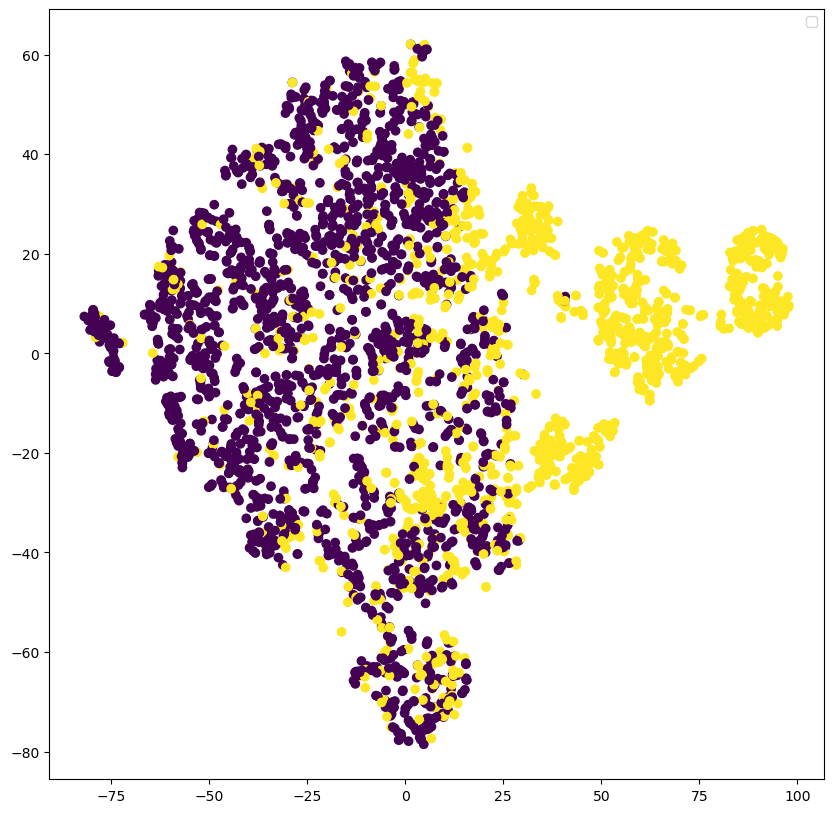

In [37]:
from sklearn.manifold import TSNE
tsne =TSNE(n_components=2,perplexity=20,random_state=42)
tsne_df = tsne.fit_transform(X_train)
fig = plt.figure(figsize=(10,10))
plt.scatter(tsne_df[:,0],tsne_df[:,1],c=y)
plt.legend()
plt.show()

In [38]:
data_csv = X_train[z]
data_csv

,Admission grade,Age at enrollment,Completion_Age_Interaction,Completion_Grade_Interaction,Completion_Rate_1st,Completion_Rate_2nd,Course_9991,Curricular units (Average grade),Curricular units 1st sem (approved),Curricular units 1st sem (grade),...,Inflation rate,Course_9119,Course_9853,Unemployment rate,Gender,Debtor,Tuition fees up to date,Previous qualification (grade),Scholarship holder,Curricular units 1st sem (evaluations)
1,1.092298,-0.580298,0.441050,0.595468,0.705675,0.755452,0.0,0.519159,0.495123,0.647111,...,-1.110385,0.0,0.0,0.845584,1,0,0,2.095864,0,-0.309414
2,-0.140723,-0.580298,-2.317344,-2.385176,-2.134191,-1.860822,0.0,-2.468742,-2.160114,-2.354506,...,0.118133,0.0,0.0,-0.314157,1,0,0,-0.814523,0,-3.729947
3,-0.502966,-0.454572,0.485974,0.491125,0.705675,0.427029,0.0,0.448296,0.495123,0.524596,...,-1.471714,0.0,0.0,-0.837911,0,0,1,-0.814523,0,0.132348
4,1.022635,2.688571,1.044089,0.482689,0.349184,0.755452,0.0,0.428402,0.284781,0.289776,...,-1.110385,0.0,0.0,0.845584,0,0,1,-2.499484,0,0.317551
5,-0.837345,3.317199,1.302980,0.466749,0.705675,0.755452,1.0,0.345258,0.284781,0.187680,...,-0.676790,0.0,0.0,1.706038,1,1,1,0.035617,0,0.485088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.321844,-0.580298,0.282335,0.395476,0.349184,0.427029,0.0,0.465602,0.284781,0.561351,...,1.129854,0.0,0.0,1.444161,1,0,1,-0.584755,0,-0.074692
4420,-0.544763,-0.706023,0.393820,0.488131,0.705675,-0.774970,0.0,0.329542,0.495123,0.218309,...,-0.459993,0.0,0.0,-0.201924,0,1,0,-0.967701,0,-0.309414
4421,1.579933,0.802685,0.844584,0.624053,0.705675,-1.416252,0.0,0.546668,0.677329,0.842752,...,-1.110385,0.0,0.0,0.845584,0,0,1,1.636330,1,0.132348
4422,1.879480,-0.454572,0.485974,0.640960,0.705675,0.755452,0.0,0.447158,0.284781,0.604231,...,-1.471714,0.0,0.0,-0.837911,0,0,1,3.627647,1,-0.580381


In [41]:
data_csv.to_csv('X.csv')
y_train.to_csv('y.csv')